# AUTOMOBILE PRICE PREDICTION

In [4]:
import pandas as pd

In [14]:
df=pd.read_csv('F:/datasets/Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [15]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df['normalized-losses']=df['normalized-losses'].replace('?','0')
df['normalized-losses']=df['normalized-losses'].astype('int')
df['normalized-losses'].mean()
df['normalized-losses']=df['normalized-losses'].replace(0,100)

In [9]:
df['bore'].unique()
df['bore']=df['bore'].replace('?','0.0')
df['bore']=df['bore'].astype('float')
df['bore'].mean()
df['bore']=df['bore'].replace(0.0,3.26)

In [10]:
df['stroke'].unique()
df['stroke']=df['stroke'].replace('?','0.0')
df['stroke']=df['stroke'].astype('float')
df['stroke'].mean()
df['stroke']=df['stroke'].replace(0.0,3.19)

In [11]:
df['horsepower'].unique()
df['horsepower']=df['horsepower'].replace('?','0')
df['horsepower']=df['horsepower'].astype('int')
df['horsepower'].mean()
df['horsepower']=df['horsepower'].replace(0,103)

In [12]:
df['peak-rpm'].unique()
df['peak-rpm']=df['peak-rpm'].replace('?','0')
df['peak-rpm']=df['peak-rpm'].astype('int')
df['peak-rpm'].mean()
df['peak-rpm']=df['peak-rpm'].replace(0,5075)

In [13]:
df['price'].unique()
df['price']=df['price'].replace('?','0')
df['price']=df['price'].astype('int')
df['price'].mean()
df['price']=df['price'].replace(0,12950)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [17]:
y=df['price']
x=df.drop(['price'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=r2_score(y_test,pred_1)

In [21]:
score_1

0.2123088603009613

<AxesSubplot:xlabel='price'>

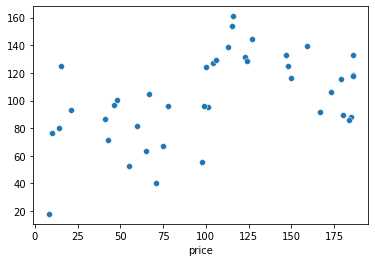

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=y_test,y=pred_1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred_2=rfg.predict(x_test)
score_2=r2_score(y_test,pred_2)

In [ ]:
score_2

In [ ]:
sns.scatterplot(x=y_test,y=pred_2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_3=gbr.predict(x_test)
score_3=r2_score(y_test,pred_3)

In [ ]:
score_3

In [ ]:
sns.scatterplot(x=y_test,y=pred_3)

In [24]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
pred_4=svm.predict(x_test)
score_4=r2_score(y_test,pred_4)

In [25]:
score_4

0.056888919594892506

In [ ]:
sns.scatterplot(x=y_test,y=pred_4)